# Proyecto Final Procesamiento Digital de Señales.

Elaborado por: Jose David Ortiz Miranda

Ingenieria de Telecomumicaciones

Universidad de Antioquia

In [35]:
## Librerias importantes
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from scipy.io import wavfile
from scipy import signal
from scipy.signal import hilbert
from IPython.display import Audio # para escuchar la senal
from IPython.display import Audio #Libreria para escuchar audio

## 1.1 Aplicación de la Transformada de Fourier a señales de audio industriales.

## $ Pregunta $ $ 1 $


### Luego de leer el numeral 1 y el numera 1.1 ¿Qué palabras claves puede resaltar? Escríbalo en el Jupyter Notebook.

### Respuesta a la Pregunta 1.

### Palabras claves:
#### Transformada de Fourier, vibraciones, amplitud, tiempo, frecuencia


### 1. Primero se importan los audios para su analisis.

### - Audio 1.

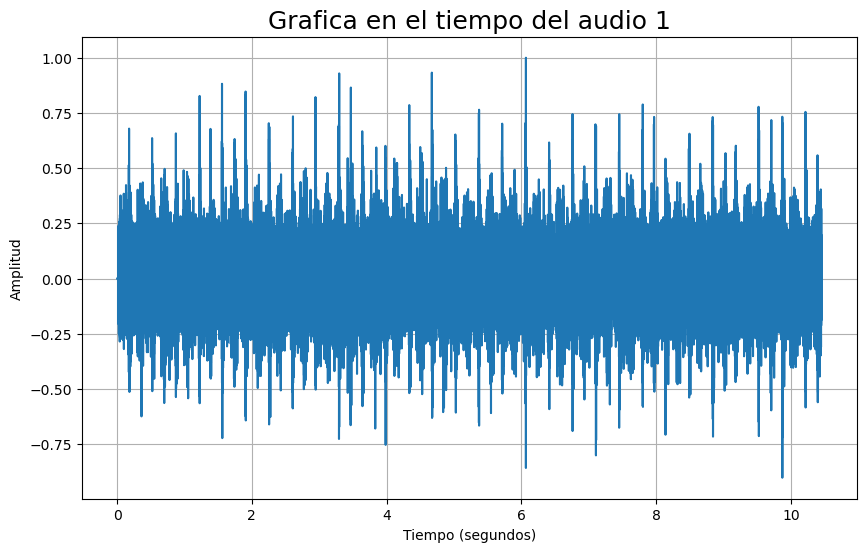

La frecuencia de este caso es:  8000


In [26]:
file_audio_1=('prensa_industrial.wav') # Ruta del archivo con la senal
fs, y=read(file_audio_1) # Cargar el archivo
y = y / np.max(np.abs(y)) # escala la amplitud de la senal
t=np.arange(0, float(len(y))/fs, 1.0/fs) # Vector de tiempo
plt.figure(figsize=(10,6))
plt.plot(t,y) # Dibujar la grafica
plt.grid()

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.title("Grafica en el tiempo del audio 1",fontsize = 18)
plt.xlabel('Tiempo (segundos)') # Etiqueta eje X
plt.ylabel('Amplitud') # Etiqueta eje Y
plt.show() # Mostrar la grafica
print("La frecuencia de este caso es: ",fs)
Audio(y, rate=fs) # para escuchar la senal

## $ Pregunta $ $ 2 $


### De la gráfica obtenida de cada audio en el dominio del tiempo. ¿Se puede decir que son señales periódicas? Y si son periódicas explique, con respecto a la gráfica, como se puede intuir que son periódicas.

### Respuesta a la pregunta 2 para el audio 1.

Para este caso no se nota que la señal sea periodica, pero se puede decir que tiene una cuasi-periodicidad porque algunos picos de amplitud son repetidos por cierto tiempo, tal vez, si el audio se siguera reproduciendo por un tiempo mas prolongado entonces si se podria decir que tiene un compotamiento periodico.

### - Audio 2.

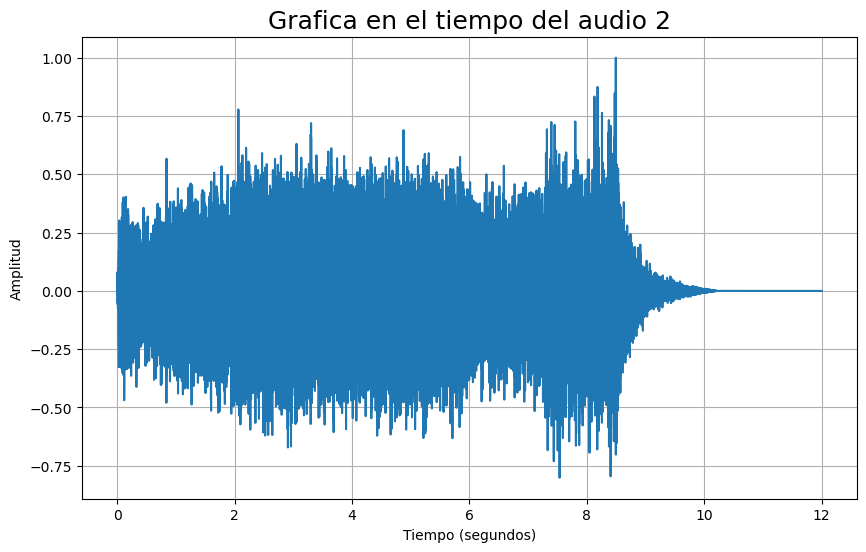

La frecuencia de este caso es:  8000


In [25]:
file_audio_2=('taladro.wav') # Ruta del archivo con la senal
fs, x=read(file_audio_2) # Cargar el archivo
x = x / np.max(np.abs(x)) # escala la amplitud de la senal
t=np.arange(0, float(len(x))/fs, 1.0/fs) # Vector de tiempo
plt.figure(figsize=(10,6))
plt.plot(t,x) # Dibujar la grafica
plt.grid()

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.title("Grafica en el tiempo del audio 2",fontsize = 18)
plt.xlabel('Tiempo (segundos)') # Etiqueta eje X
plt.ylabel('Amplitud') # Etiqueta eje Y
plt.show() # Mostrar la grafica
print("La frecuencia de este caso es: ",fs)
Audio(x, rate=fs) # para escuchar la senal

### Respuesta a la pregunta 2 para el audio 2.

Para este audio no se ve una periodicidad marcada por lo tanto se puede decir que no es periodica, ademas la intensidad del sonido va aumentando, eso se puede ver refleajado en la cantidad de picos que tiene la señal en el eje de amplitud.

### - Audio 3.

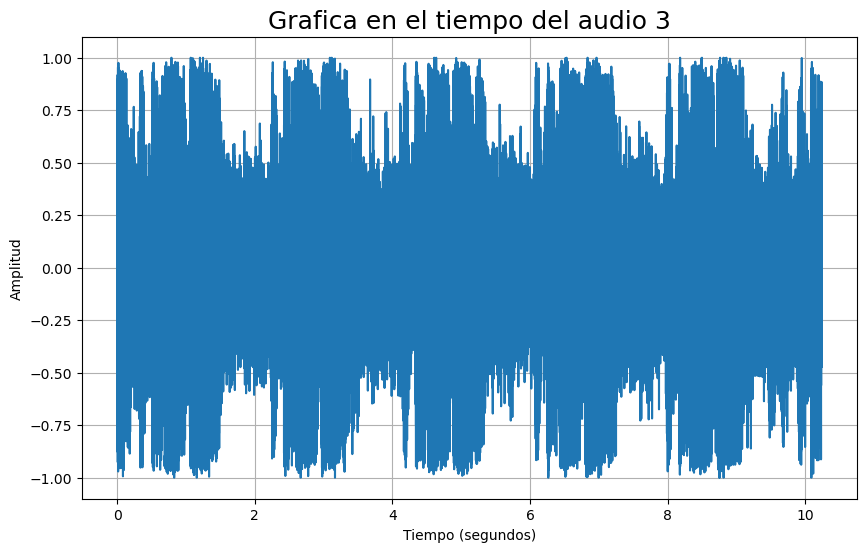

La frecuencia de este caso es:  8000


In [24]:
file_audio_3=('ambiente_fabrica.wav') # Ruta del archivo con la senal
fs, z=read(file_audio_3) # Cargar el archivo
z = z / np.max(np.abs(z)) # escala la amplitud de la senal
t=np.arange(0, float(len(z))/fs, 1.0/fs) # Vector de tiempo
plt.figure(figsize=(10,6))
plt.plot(t,z) # Dibujar la grafica
plt.grid()

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.title("Grafica en el tiempo del audio 3",fontsize = 18)
plt.xlabel('Tiempo (segundos)') # Etiqueta eje X
plt.ylabel('Amplitud') # Etiqueta eje Y
plt.show() # Mostrar la grafica
print("La frecuencia de este caso es: ",fs)
Audio(z, rate=fs) # para escuchar la senal

### Respuesta a la pregunta 2 para el audio 3.

En este audio si se ve una tendencia periodica marcada del segundo 0 a 5, se puede observar que se hacen tres ciclos completos de periodo, se puede aproximar que cada periodo esta durando 2.2 segundos aproximadamente puesto que la grafica no es muy clara con las particiones de los segundos, sin embargo si se ve una periodicidad que se hace evidente solo con la grafica.

### 2. Aplicación de la FFT para los audios.

In [5]:
### Primero definamos la funcion
def dftmatrix(N, Nfft):
#construct DFT matrix
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None]))
    return U/np.sqrt(Nfft)

### Aplicacion de la FFT para el audio 1.

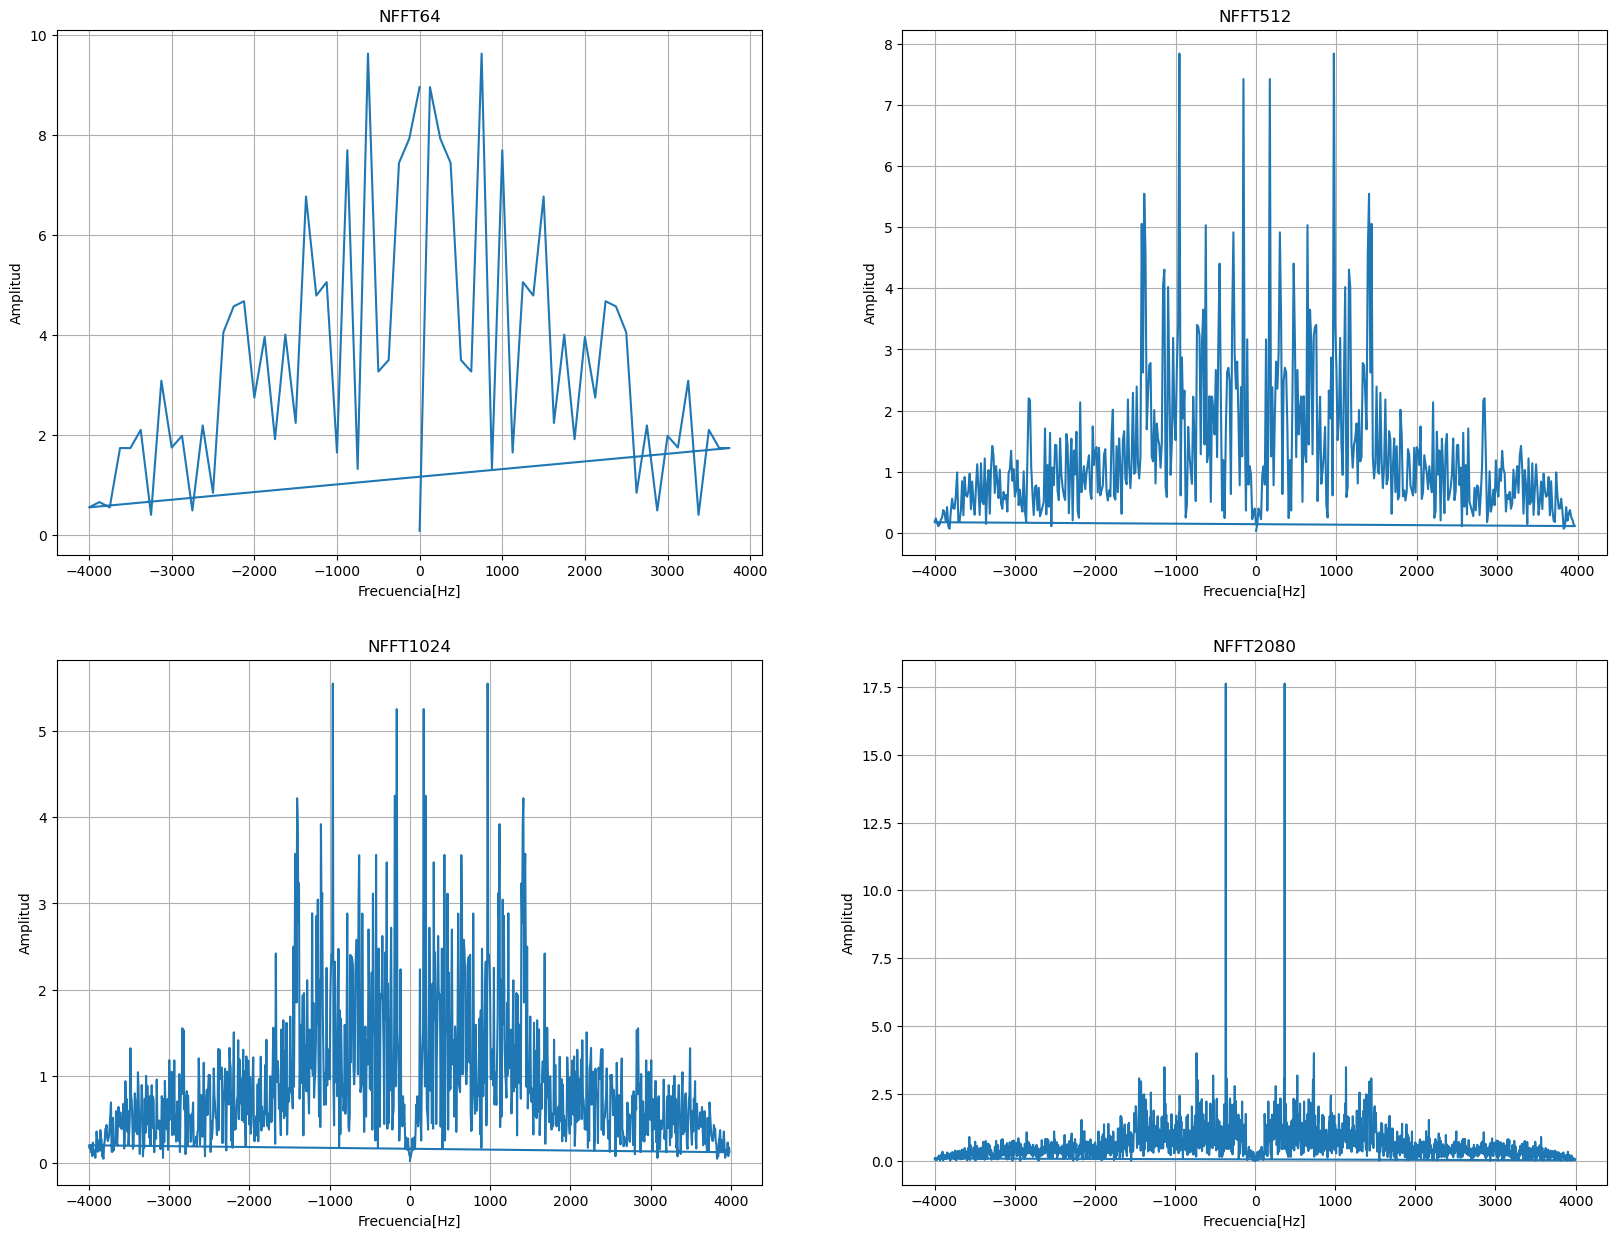

In [6]:
y.shape=(len(y),1) # Convierto en vector columna para poder multiplicar con la matriz

nfft=[64,512,1024,2080] #reconstruccion numero de puntos
DTFS=[] #Almacena la transformada en cada caso 

plt.figure(figsize=(20,15))

for i in range (len(nfft)):
    U = dftmatrix(len(y), nfft[i]) # Calculo la matriz de transformacion
    Xf=U.H*y[:]# Calculo la fft transfromada de fourier
    Xf=np.array(Xf)
    DTFS.append(Xf)
    freq=(np.hstack((np.arange(0, nfft[i]/2-1), np.arange(-nfft[i]/2, 1))))*fs/nfft[i]
    plt.subplot(2,2,i+1)
    plt.plot(freq,np.abs(Xf))
    plt.grid();plt.xlabel("Frecuencia[Hz]");plt.ylabel("Amplitud");
    plt.title("NFFT"+str(nfft[i]))
plt.show()

## $ Pregunta $ $ 3 $

### Cuando aplicó la NFFT con un número menor. ¿Qué noto de diferente entre las gráficas generadas?

### Respuesta de la Pregunta 3 para el audio 1.

En este caso para un número menor de NFFT se nota que el espectro no tiene suficientes muestras para generar una resolución mas fiel del espectro que corresponde a este audio, las componentes no estan bien definidas y no se puede analizar que componentes estan llegando a un valor de amplitud especifico. Se nota, a pesar del numero pequeño de NFFT, que el espectro sigue manteniendo su propiedadde simetria.


### Aplicacion de la FFT para el audio 2.

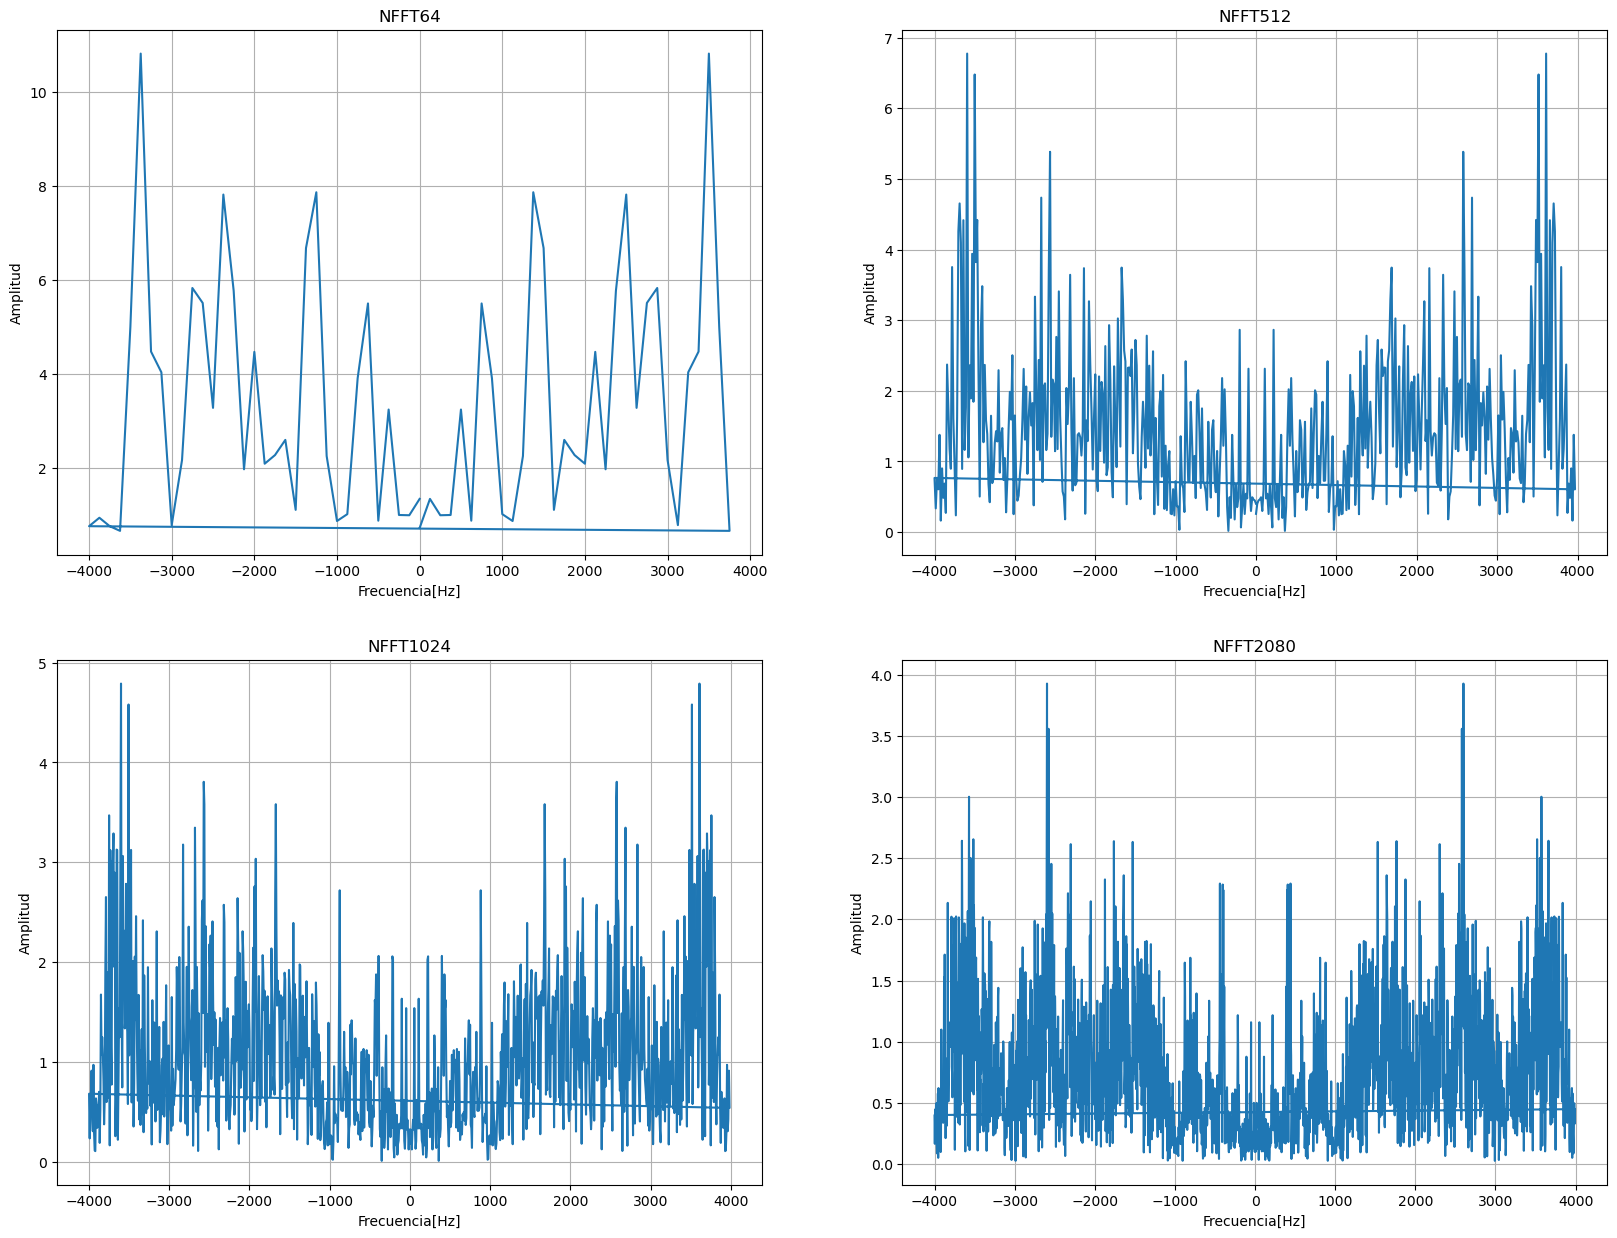

In [7]:
x.shape=(len(x),1) # Convierto en vector columna para poder multiplicar con la matriz

nfft=[64,512,1024,2080] #reconstruccion numero de puntos
DTFS=[] #Almacena la transformada en cada caso 

plt.figure(figsize=(20,15))
for i in range (len(nfft)):
    U = dftmatrix(len(x), nfft[i]) # Calculo la matriz de transformacion
    Xf=U.H*x[:]# Calculo la fft transfromada de fourier
    Xf=np.array(Xf)
    DTFS.append(Xf)
    freq=(np.hstack((np.arange(0, nfft[i]/2-1), np.arange(-nfft[i]/2, 1))))*fs/nfft[i]
    plt.subplot(2,2,i+1)
    plt.plot(freq,np.abs(Xf))
    plt.grid();plt.xlabel("Frecuencia[Hz]");plt.ylabel("Amplitud");
    plt.title("NFFT"+str(nfft[i]))
plt.show()

### Respuesta de la Pregunta 3 para el audio 2.

En este caso el número mas pequeño de NFFT sigue siendo insuficiente para generar un espectro que permita un analisis mas fiel del dominio de la frecuencia, ademas, el audio contiene muchas componentes en frecuencia que son representadas de mejor manera si se tiene un numero mayor de NFFT, se logra notar que para un valor mayor de NFFT la representacion mejora notoriamente.

### Aplicacion de la FFT para el audio 3.

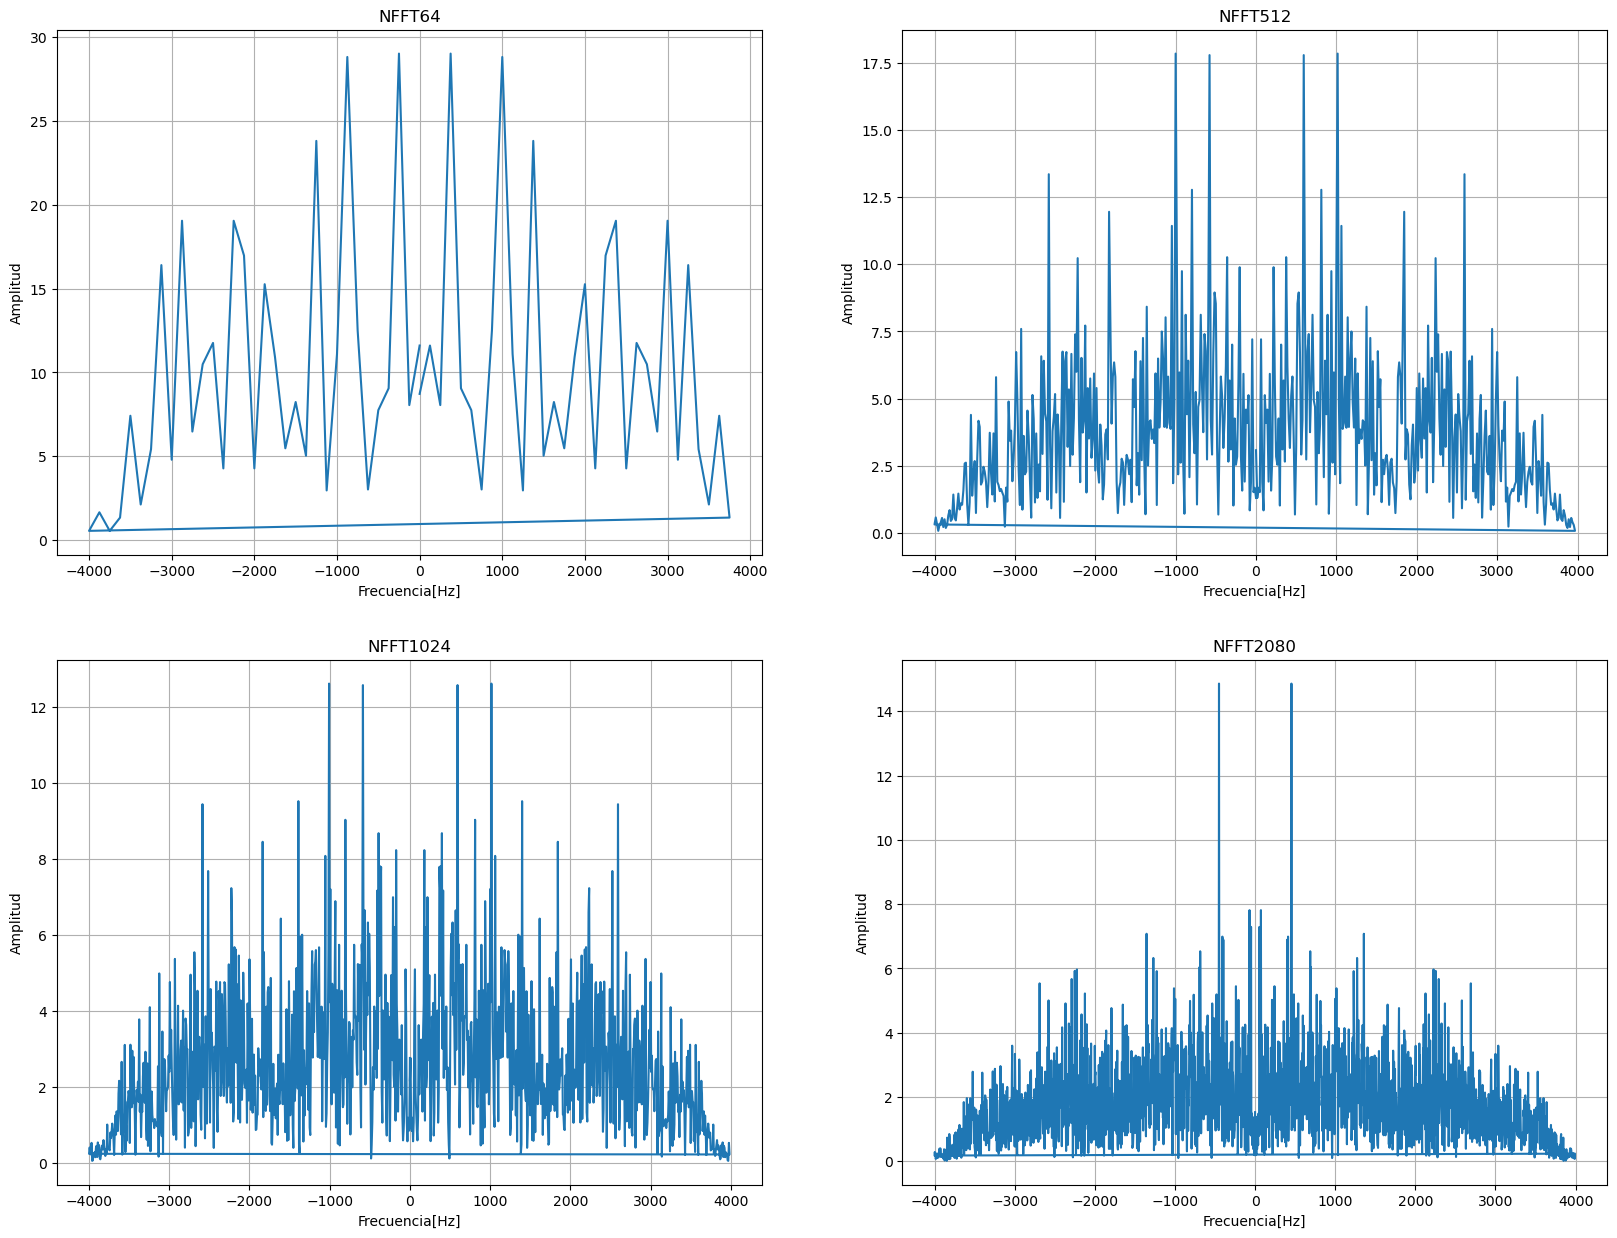

In [8]:
z.shape=(len(z),1) # Convierto en vector columna para poder multiplicar con la matriz

nfft=[64,512,1024,2080] #reconstruccion numero de puntos
DTFS=[] #Almacena la transformada en cada caso 

plt.figure(figsize=(20,15))
for i in range (len(nfft)):
    U = dftmatrix(len(z), nfft[i]) # Calculo la matriz de transformacion
    Xf=U.H*z[:]# Calculo la fft transfromada de fourier
    Xf=np.array(Xf)
    DTFS.append(Xf)
    freq=(np.hstack((np.arange(0, nfft[i]/2-1), np.arange(-nfft[i]/2, 1))))*fs/nfft[i]
    plt.subplot(2,2,i+1)
    plt.plot(freq,np.abs(Xf))
    plt.grid();plt.xlabel("Frecuencia[Hz]");plt.ylabel("Amplitud");
    plt.title("NFFT"+str(nfft[i]))
plt.show()

### Respuesta de la Pregunta 3 para el audio 3.

En el espectro con un menor numero de NFFT sigue siendo un numero muy pequeño para representar todas las componentes en frecuencia, sin embargo, si muestra la tendencia que va a mantener el espectro, y con un numero de NFFT se confirma que ese ese es el comportamiento del espectro de este audio.

## $ Pregunta $ $ 4 $

### Si usted fuera analista de las gráficas de tiempo y de frecuencia, ¿Cómo intuiría que alguna maquina tiene alguna anomalía?

Analizando la grafica en el dominio del tiempo, trataria de observar si existe alguna forma de onda inusual o cambios bruscos de amplitud durante un tiempo prolongado de uso. Por ejemplo, picos o caídas bruscas en la amplitud pueden indicar impactos o fallos repentinos en el funcionamiento de la máquina. Variaciones irregulares o patrones anómalos en la forma de onda también pueden ser indicadores de problemas.

Analizando el espectro de frecuencias, analizaria si existen frecuencias inusuales que no esten dentro de las frecuencias comunes de la maquina. Por ejemplo, la presencia de picos adicionales, armónicos no deseados, ruido excesivo o la ausencia de frecuencias características esperadas pueden ser señales de una anomalía en la máquina.



## $ Pregunta $ $ 5 $

### ¿Cree usted que todas las maquinas industriales tienen un comportamiento periódico?

No todas las maquinas tienen un comportamiento periodico.  El comportamiento periódico implica que la máquina contiene patrones regulares y predecibles en su funcionamiento a lo largo del tiempo. 

Es importante tener en cuenta que el análisis de las gráficas en el dominio del tiempo y de la frecuencia puede revelar componentes de frecuencia o patrones periódicos en la señal, pero esto no necesariamente significa que toda la máquina tenga un comportamiento periódico. El comportamiento de una máquina puede estar influenciado por diversos factores, como la carga de trabajo, las condiciones de operación y la presencia de posibles fallas o anomalías.

## $ Pregunta $ $ 6 $

### Si usted fuera analista de graficas en el dominio de la frecuencia ¿Consideraría correcto tener un rango de tolerancia de error en las frecuencias para analizar un espectro de una maquina determinada?

Si, es una practica muy común en el mundo industrial porque establecer un rango de tolerancia de error en las frecuencias significa definir un margen aceptable de desviación o diferencia permitida entre las frecuencias medidas y las frecuencias de referencia. Esto se debe a que las máquinas pueden tener componentes de frecuencia específicos asociados a su funcionamiento normal y esperado. Cualquier desviación significativa de estas frecuencias puede indicar problemas o anomalías en la máquina.

## 2.1 Analisis en el dominio del tiempo y de la frecuencia de los audios musicales.

### 1. Se importan los audios para su analisis.

## Audio Musical 1.

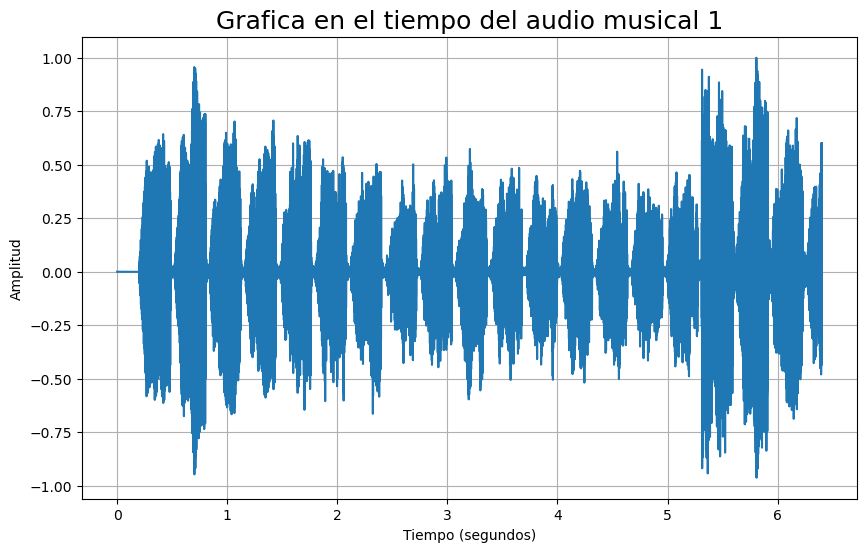

La frecuencia de este caso es:  8000


In [23]:
file_audio_4=('BCY.wav') # Ruta del archivo con la senal
fs, b = read(file_audio_4) # Cargar el archivo
b = b / np.max(np.abs(b)) # escala la amplitud de la senal
t=np.arange(0, float(len(b))/fs, 1.0/fs) # Vector de tiempo

plt.figure(figsize=(10,6))

plt.plot(t,b) # Dibujar la grafica
plt.grid()

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.title("Grafica en el tiempo del audio musical 1",fontsize = 18)
plt.xlabel('Tiempo (segundos)') # Etiqueta eje X
plt.ylabel('Amplitud') # Etiqueta eje Y
plt.show() # Mostrar la grafica
print("La frecuencia de este caso es: ",fs)
Audio(b, rate=fs) # para escuchar la senal

## Audio Musical 2.

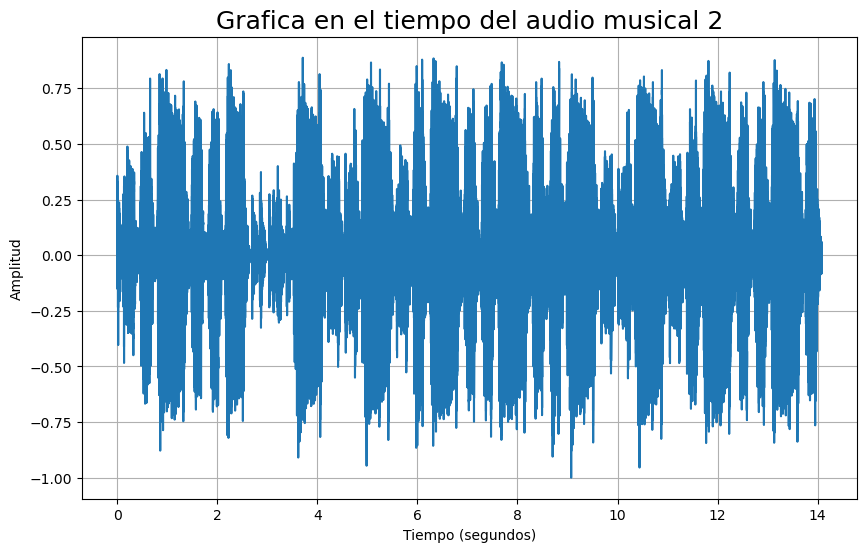

La frecuencia de este caso es:  8000


In [22]:
file_audio_5=('TVS.wav') # Ruta del archivo con la senal
fs, c = read(file_audio_5) # Cargar el archivo
c = c / np.max(np.abs(c)) # escala la amplitud de la senal
t=np.arange(0, float(len(c))/fs, 1.0/fs) # Vector de tiempo

plt.figure(figsize=(10,6))

plt.plot(t,c) # Dibujar la grafica
plt.grid()

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.title("Grafica en el tiempo del audio musical 2",fontsize = 18)
plt.xlabel('Tiempo (segundos)') # Etiqueta eje X
plt.ylabel('Amplitud') # Etiqueta eje Y
plt.show() # Mostrar la grafica
print("La frecuencia de este caso es: ",fs)
Audio(c, rate=fs) # para escuchar la senal

## Audio Musical 3.

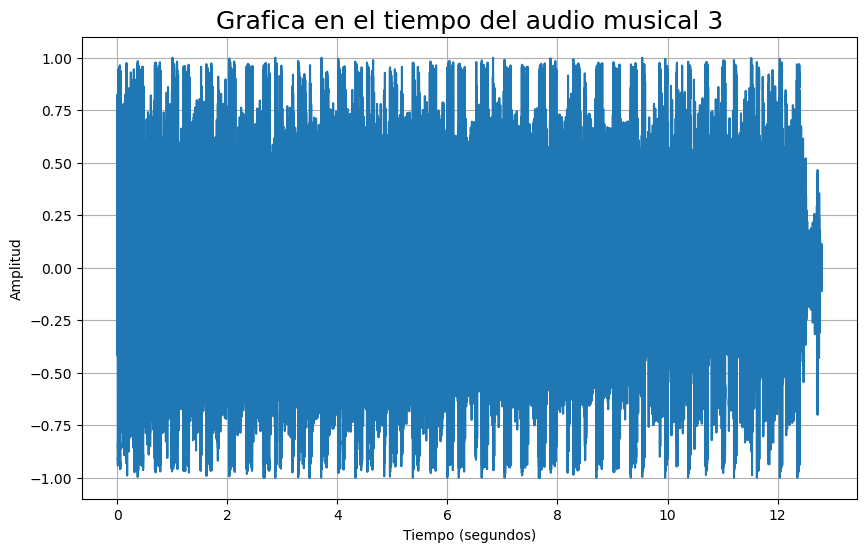

La frecuencia de este caso es:  8000


In [21]:
file_audio_6=('WSG.wav') # Ruta del archivo con la senal
fs, a = read(file_audio_6) # Cargar el archivo
a = a / np.max(np.abs(a)) # escala la amplitud de la senal
t=np.arange(0, float(len(a))/fs, 1.0/fs) # Vector de tiempo

plt.figure(figsize=(10,6))

plt.plot(t,a) # Dibujar la grafica
plt.grid()

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.title("Grafica en el tiempo del audio musical 3",fontsize = 18)
plt.xlabel('Tiempo (segundos)') # Etiqueta eje X
plt.ylabel('Amplitud') # Etiqueta eje Y
plt.show() # Mostrar la grafica
print("La frecuencia de este caso es: ",fs)
Audio(a, rate=fs) # para escuchar la senal

## $ Pregunta $ $ 7 $ 

### ¿Qué sonidos le parecen interesantes en cada audio?

Del primer audio me parece muy interesate esa flauta que parece estar modificada por un ecualizador para que suene de esa manera, me parece interesante porque lleva la melodia y seguramente sera la forma que lleve la cancion.

Del segundo audio, me parece muy interesante la guitarra electrica que lleva la melodia principal, porque lleva ese sonido que hace moverse y sospecho que debe ser la parte que es mas caracteristica de la cancion.

Y del tercer audio, me parece muy interesante la percusion, ese kick o golpe que es caracteristico para este tipo de canciones, creo que marca el ritmo de a canción y la manera de transmitir la emoción de ese audio. 

### 2. Analisis en frecuencia de los audios.

## Analisis en frecuencia del Audio musical 1.

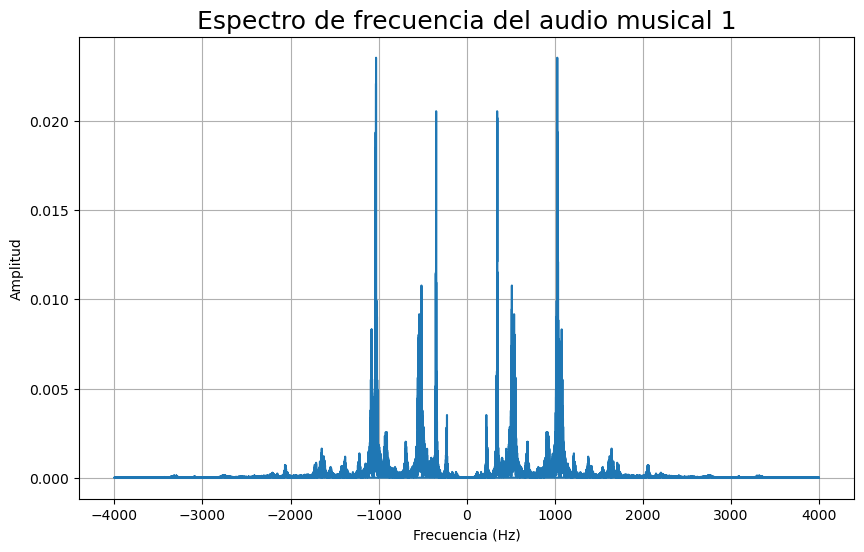

In [11]:
# Obtener la transformada de Fourier de los datos de audio
transformada_fourier = np.fft.fft(b)

# Calcular las frecuencias correspondientes a los coeficientes de la transformada
frecuencias = np.fft.fftfreq(len(b), 1 / fs)

# Obtener el espectro de amplitud (magnitud) normalizado
espectro_amplitud = np.abs(transformada_fourier) / len(b)

# Crear una figura para mostrar el espectro de frecuencia
plt.figure(figsize=(10, 6))
plt.plot(frecuencias[:len(frecuencias)], espectro_amplitud[:len(frecuencias)])
plt.title('Espectro de frecuencia del audio musical 1', fontsize = 18)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()


## Analisis en frecuencia del Audio musical 2.

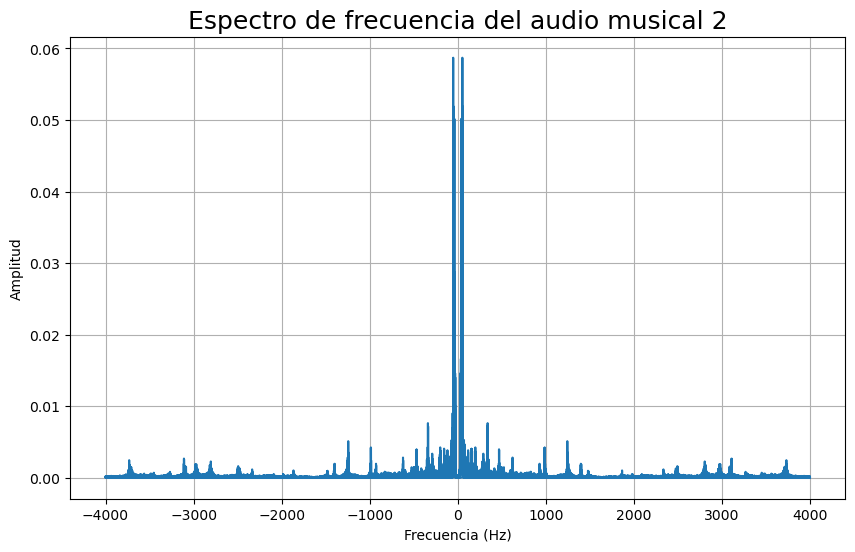

In [17]:
# Obtener la transformada de Fourier de los datos de audio
transformada_fourier_1 = np.fft.fft(c)

# Calcular las frecuencias correspondientes a los coeficientes de la transformada
frecuencias_1 = np.fft.fftfreq(len(c), 1 / fs)

# Obtener el espectro de amplitud (magnitud) normalizado
espectro_amplitud_1 = np.abs(transformada_fourier_1) / len(c)

# Crear una figura para mostrar el espectro de frecuencia
plt.figure(figsize=(10, 6))
plt.plot(frecuencias_1[:len(frecuencias_1)], espectro_amplitud_1[:len(frecuencias_1)])
plt.title('Espectro de frecuencia del audio musical 2', fontsize = 18)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

## Analisis en frecuencia del Audio musical 3.

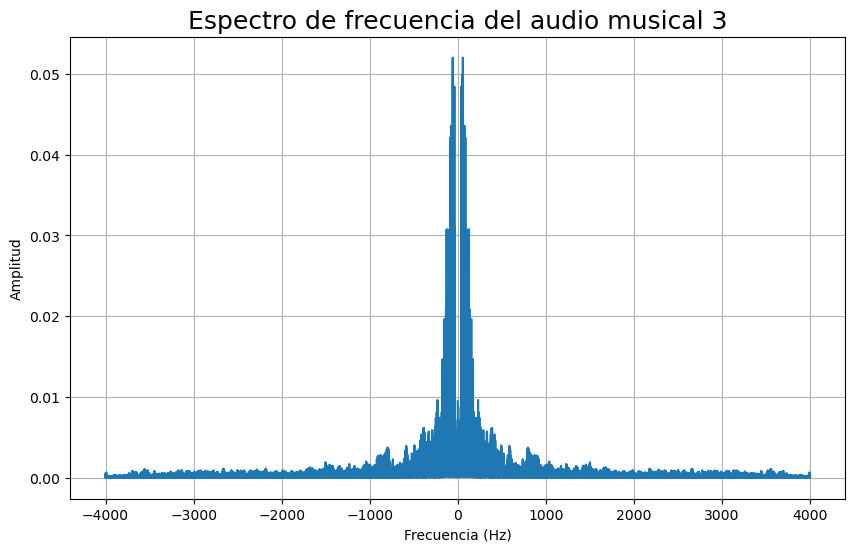

In [20]:
# Obtener la transformada de Fourier de los datos de audio
transformada_fourier_2 = np.fft.fft(a)

# Calcular las frecuencias correspondientes a los coeficientes de la transformada
frecuencias_2 = np.fft.fftfreq(len(a), 1 / fs)

# Obtener el espectro de amplitud (magnitud) normalizado
espectro_amplitud_2 = np.abs(transformada_fourier_2) / len(a)

# Crear una figura para mostrar el espectro de frecuencia
plt.figure(figsize=(10, 6))

plt.plot(frecuencias_2[:len(frecuencias_2)], espectro_amplitud_2[:len(frecuencias_2)])
plt.title('Espectro de frecuencia del audio musical 3', fontsize = 18)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

### 3. Diseño del filtro FIR para cada audio.

## Filtro FIR para Audio musical 1.

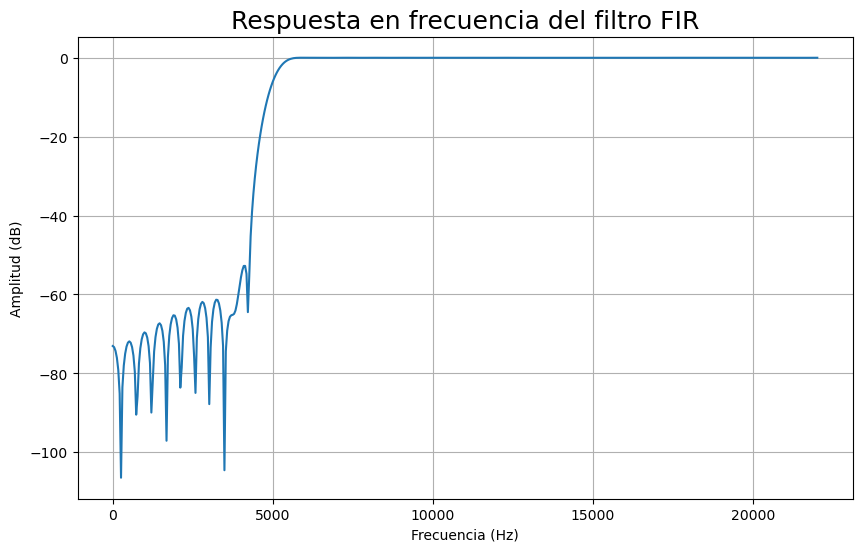

In [55]:
# Frecuencia de corte del filtro pasa altas (en Hz)
frecuencia_corte = 5000

# Orden del filtro FIR
orden_filtro = 101

# Crear la respuesta de impulso del filtro FIR (pasa altas)
respuesta_impulso = signal.firwin(orden_filtro, frecuencia_corte, fs = 44100, pass_zero=False)

# Calcular la respuesta en frecuencia del filtro FIR
frecuencias, respuesta_frecuencia = signal.freqz(respuesta_impulso, 1, fs = 44100)

# Graficar la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.plot(frecuencias, 20 * np.log10(np.abs(respuesta_frecuencia)))

plt.title('Respuesta en frecuencia del filtro FIR', fontsize = 18)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (dB)')
plt.grid()
plt.show()


In [51]:
# Aplicar el filtro FIR al audio
audio_filtrado = signal.lfilter(respuesta_impulso, 1, b)

In [52]:
Audio(audio_filtrado, rate=fs) # para escuchar la senal

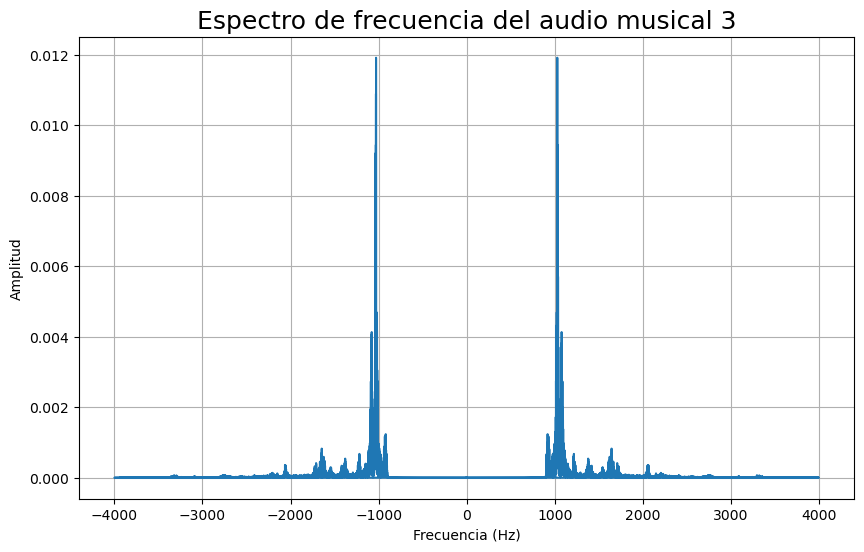

In [53]:
# Obtener la transformada de Fourier de los datos de audio
transformada_fourier_2 = np.fft.fft(audio_filtrado)

# Calcular las frecuencias correspondientes a los coeficientes de la transformada
frecuencias_2 = np.fft.fftfreq(len(audio_filtrado), 1 / fs)

# Obtener el espectro de amplitud (magnitud) normalizado
espectro_amplitud_2 = np.abs(transformada_fourier_2) / len(a)

# Crear una figura para mostrar el espectro de frecuencia
plt.figure(figsize=(10, 6))

plt.plot(frecuencias_2[:len(frecuencias_2)], espectro_amplitud_2[:len(frecuencias_2)])
plt.title('Espectro de frecuencia del audio musical 3', fontsize = 18)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()